In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from acoustic_function import initialize_acoustic_model, simulate_trajectory

## Example Usage and Visualization

In [3]:
# Simulate a trajectory
tf.random.set_seed(1)
model_params = initialize_acoustic_model()
x0_initial_target_states = model_params['x0_initial_target_states']
T = 40  # Number of time steps (as in the paper)
states, observations = simulate_trajectory(model_params, T,
                       keep_in_bounds=True)
    
print(f"States shape: {states.shape}  (should be ({model_params['state_dim']}, {T+1}))")
print(f"Observations shape: {observations.shape}  (should be ({model_params['n_sensors']}, {T}))")

States shape: (16, 41)  (should be (16, 41))
Observations shape: (25, 40)  (should be (25, 40))


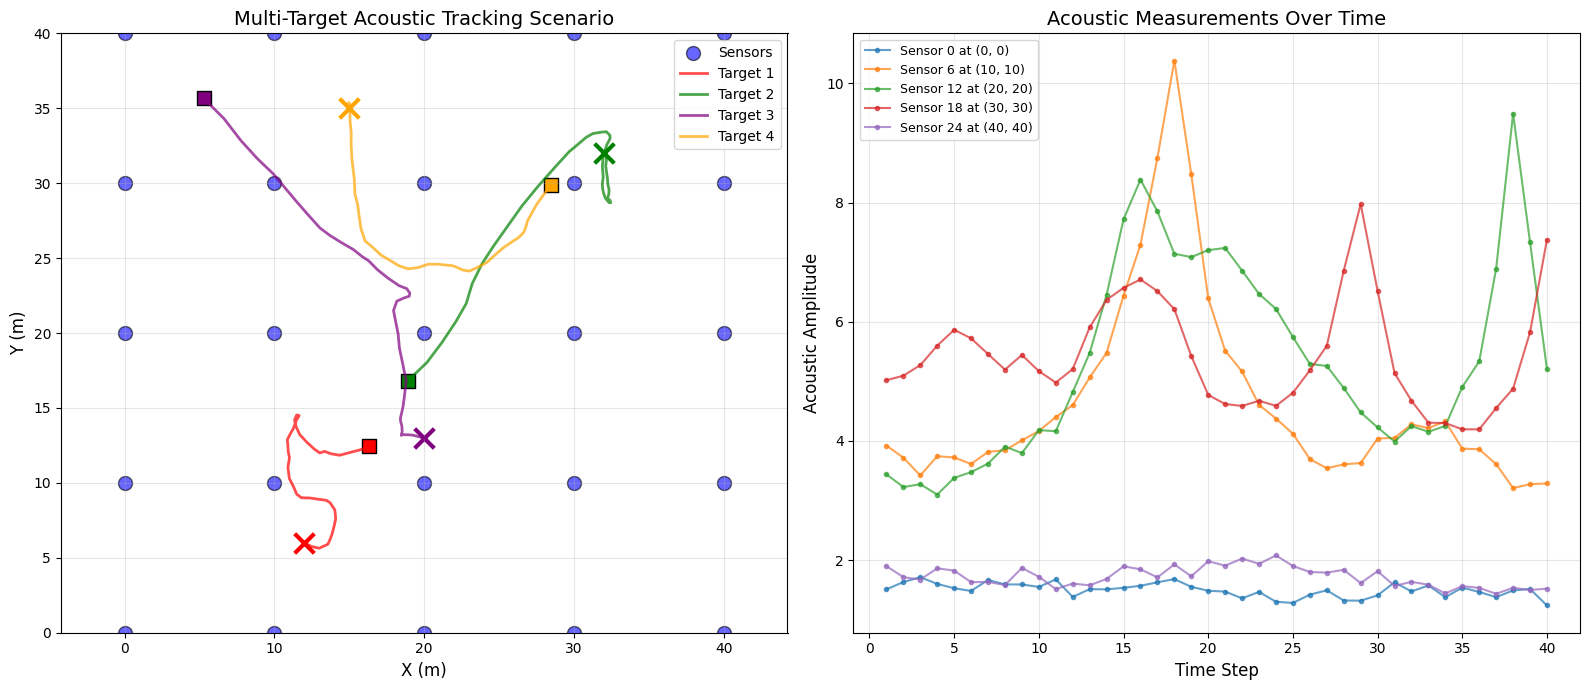

In [4]:
# Visualize trajectories
# Similar to MATLAB: AcousticParticlePlot.m
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Target trajectories and sensor positions
ax = axes[0]
sensor_pos = model_params['sensor_positions'].numpy()

# Plot sensors as blue circles
ax.scatter(sensor_pos[:, 0], sensor_pos[:, 1], c='blue', marker='o', 
           s=100, label='Sensors', alpha=0.6, edgecolors='black')

# Plot trajectories for each target
colors = ['red', 'green', 'purple', 'orange']
states_np = states.numpy()

for i in range(model_params['n_targets']):
    x_traj = states_np[i * 4, :]
    y_traj = states_np[i * 4 + 1, :]
    
    ax.plot(x_traj, y_traj, '-', color=colors[i], linewidth=2, 
            label=f'Target {i+1}', alpha=0.7)
    
    ax.scatter(x_traj[0], y_traj[0], color=colors[i], marker='x', 
               s=200, linewidths=3)
    ax.scatter(x_traj[-1], y_traj[-1], color=colors[i], marker='s', 
               s=100, edgecolors='black')

ax.set_xlabel('X (m)', fontsize=12)
ax.set_ylabel('Y (m)', fontsize=12)
ax.set_title('Multi-Target Acoustic Tracking Scenario', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='best', fontsize=10)
ax.axis('equal')
ax.set_xlim([0, model_params['sim_area_size']])
ax.set_ylim([0, model_params['sim_area_size']])

# Plot 2: Measurements over time (sample sensors)
ax = axes[1]
obs_np = observations.numpy()

# Plot measurements from 5 representative sensors
sensor_indices = [0, 6, 12, 18, 24]
for idx in sensor_indices:
    if idx < model_params['n_sensors']:
        ax.plot(range(1, T+1), obs_np[idx, :], '-o', 
                label=f'Sensor {idx} at ({sensor_pos[idx, 0]:.0f}, {sensor_pos[idx, 1]:.0f})',
                alpha=0.7, markersize=3)

ax.set_xlabel('Time Step', fontsize=12)
ax.set_ylabel('Acoustic Amplitude', fontsize=12)
ax.set_title('Acoustic Measurements Over Time', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='best', fontsize=9)

plt.tight_layout()
plt.show()